<a href="https://colab.research.google.com/github/jiw3026/baseline_/blob/main/00_scikit_learn_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5_%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8E%E1%85%A5%E1%84%85%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리 (Data Preprocessing)

데이터 전처리는 데이터 분석 및 머신러닝 학습을 위해서 매우 중요한 단계 입니다. 실무 프로젝트에서는 전체 프로젝트 기간 중 평균 50~70% 이상 시간을 전처리 및 EDA에 투자한다고 합니다. 그만큼 좋은 전처리를 하면 할수록 좋은 성능을 내는 머신러닝 모델을 만들 수 있습니다.

이번 주제는 바로 전처리(pre-processing) 입니다.

scikit-learn 패키지를 활용한 전처리를 알아보도록 하겠습니다.

In [ ]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

## 1. 결측치 (MissingData)

In [ ]:
df = pd.DataFrame([
    [2, 1, 3],
    [3, 2, 5],
    [3, np.nan, 7],
    [5, np.nan, 10],
    [7, 5, 12],
    [2, 5, 7],
    [8, 9, 13],
    [9, 10, 13],
    [6, 12, 12],
    [9, 2, 13],
    [6, 10, 12],
    [2, 4, 6]
], columns=['hour', 'attendance', 'score'])

df

,hour,attendance,score
0,2,1.0,3
1,3,2.0,5
2,3,NaN,7
3,5,NaN,10
4,7,5.0,12
5,2,5.0,7
6,8,9.0,13
7,9,10.0,13
8,6,12.0,12
9,9,2.0,13


### 결측치 확인

In [ ]:
df.isnull().sum()

hour          0
attendance    1
score         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        12 non-null     int64  
 1   attendance  10 non-null     float64
 2   score       12 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 416.0 bytes


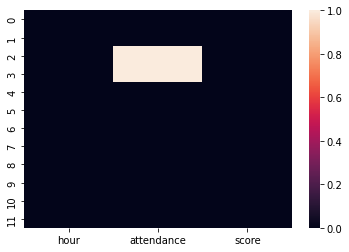

In [ ]:
sns.heatmap(df.isnull())

### 결측치 처리 - pandas 

In [ ]:
# 제거 
df.dropna(axis=1)

,hour,score
0,2,3
1,3,5
2,3,7
3,5,10
4,7,12
5,2,7
6,8,13
7,9,13
8,6,12
9,9,13


In [ ]:
df.dropna(axis=0)

,hour,attendance,score
0,2,1.0,3
1,3,2.0,5
4,7,5.0,12
5,2,5.0,7
6,8,9.0,13
7,9,10.0,13
8,6,12.0,12
9,9,2.0,13
10,6,10.0,12
11,2,4.0,6


In [ ]:
# thresh : 축을 기준으로 n개 미만 입력되면 그 축을 삭제하겠다.
df.dropna(axis = 0, thresh=3)

,hour,attendance,score
0,2,1.0,3
1,3,2.0,5
4,7,5.0,12
5,2,5.0,7
6,8,9.0,13
7,9,10.0,13
8,6,12.0,12
9,9,2.0,13
10,6,10.0,12
11,2,4.0,6


In [ ]:
df

,hour,attendance,score
0,2,1.0,3
1,3,2.0,5
2,3,NaN,7
3,5,NaN,10
4,7,5.0,12
5,2,5.0,7
6,8,9.0,13
7,9,10.0,13
8,6,12.0,12
9,9,2.0,13


In [ ]:
# fillna 
df.fillna(method = 'bfill')

,hour,attendance,score
0,2,1.0,3
1,3,2.0,5
2,3,5.0,7
3,5,5.0,10
4,7,5.0,12
5,2,5.0,7
6,8,9.0,13
7,9,10.0,13
8,6,12.0,12
9,9,2.0,13


In [ ]:
val = np.mean(df['attendance'])
df.fillna(val)

,hour,attendance,score
0,2,1.0,3
1,3,2.0,5
2,3,6.0,7
3,5,6.0,10
4,7,5.0,12
5,2,5.0,7
6,8,9.0,13
7,9,10.0,13
8,6,12.0,12
9,9,2.0,13


### 결측치 처리 - Sklearn

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df)
data_filled = imputer.transform(df)

In [ ]:
data_filled

array([[ 2.,  1.,  3.],
       [ 3.,  2.,  5.],
       [ 3.,  2.,  7.],
       [ 5.,  2., 10.],
       [ 7.,  5., 12.],
       [ 2.,  5.,  7.],
       [ 8.,  9., 13.],
       [ 9., 10., 13.],
       [ 6., 12., 12.],
       [ 9.,  2., 13.],
       [ 6., 10., 12.],
       [ 2.,  4.,  6.]])

In [ ]:
# 중간값을 기준으로 결측치를 채워넣으세요 

imputer.fit(X_train)
imputer.fit_transform(X_train)
imputer.transform(X_test)

데이터가 학습 데이터와 테스트 데이터로 나누어 진 경우는 반드시 fit() 함수와 transform() 함수를 따로 사용
- train데이터를 기준으로 fit을 시킨 후 해당 imputer 객체로 test데이터 transform

## 스케일링 - 수치형 데이터 

특성 스케일링(feature scaling)
- 특성들의 범위가 같은 크기를(최대 - 최소) 갖도록 특성별로 값을 비례적으로 조정, 데이터의 크기가 특정 범위 안에 들어오게 하기

거리 기반 머신 러닝 모델 (선형회귀모델, k-최근접 이웃 모델, 서포트 벡터 머신 모델)과 딥러닝 모델은 특성들의 사이의 범위가 크고 작음에 민감하기 때문에, 단위를 일정하게 맞추는 작업을 진행해야 합니다. 

사이킷런에서 제공하는 스케일링은 여러 개가 있는데, 그 중 대표는 다음 네 개이다. 

- StandardScaler: 기본 스케일, 평균과 표준편차 사용
- MinMaxScaler: 최대값이 1, 최소값이 0이 되도록 스케일링
- MaxAbsScaler: 최대절대값이 1, 최소절대값이 0이 되도록 스케일링 
- RobustScaler: 중앙값과 IQR을 사용. 아웃라이어의 영향을 최소화함 

그 중에서도 가장 대표적인 StandardScaler(Standardization)과 MinMaxScaler(Normalization)을 살펴보자

### StandardScaler : 표준화(Standardization)

표준화는 데이터의 평균을 0 분산 및 표준편차를 1로 만들어 줍니다.

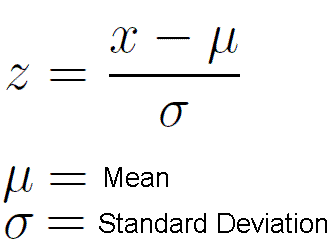

- 표준화를 하면 평균은 0, 분산과 표준편차는 1로 만들어 데이터의 분포를 단순화 시키고, 비교를 용이하게 합니다.
- 또한,  대부분의 통계 분석 방법이 정규성 가정을 기반으로 하므로 완벽하지 않더라도 최대한 정규분포로 변환하는 노력이 필요하다.

In [ ]:
from sklearn.datasets import load_iris

# iris 데이터를 가져옵니다.
iris = load_iris()
x = iris['data']
y = iris['target']

In [ ]:
# 4개의 feature 데이터 중 1개의 feature만 임의로 선택합니다.

X = x[:, 0]
X

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [ ]:
#  직접 구현해보겠습니다.
X_std = (X - X.mean()) / X.std()
X_std

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


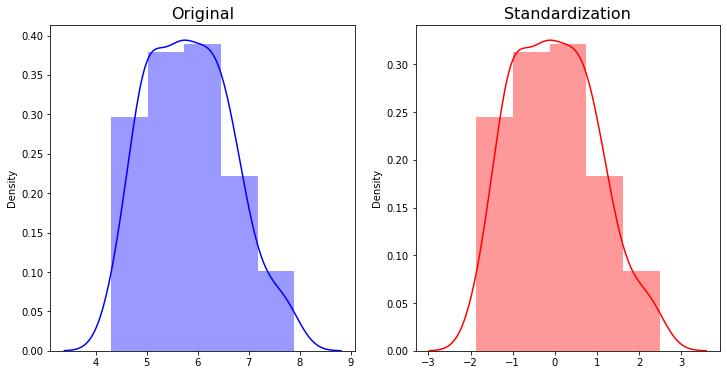

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b')
plt.title('Original', fontsize=16)

plt.subplot(1, 2, 2)
sns.distplot(X_std, bins=5, color='r')
plt.title('Standardization', fontsize=16)
plt.show()

### Sklearn StandardScaler 사용

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

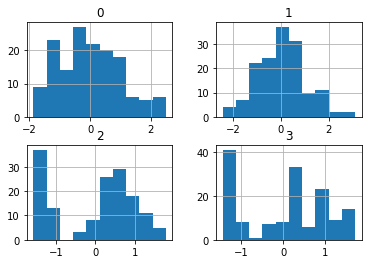

In [ ]:
pd.DataFrame(x_scaled).hist()
plt.show()

### MinMax Scaler : 정규화(Normalization)

- 정규화 (Normalization)도 표준화와 마찬가지로 데이터의 스케일을 조정합니다.

- 정규화가 표준화와 다른 가장 큰 특징은 모든 데이터가 0 ~ 1 사이의 값을 가집니다.

- 즉, 최대값은 1, 최소값은 0으로 데이터의 범위를 조정합니다.

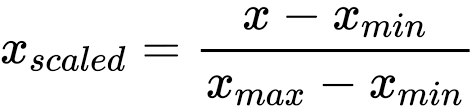

In [ ]:
# 샘플 데이터를 로드합니다.
X = x[:, 0]

In [ ]:
X_mm = (X - X.min()) / (X.max() - X.min())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


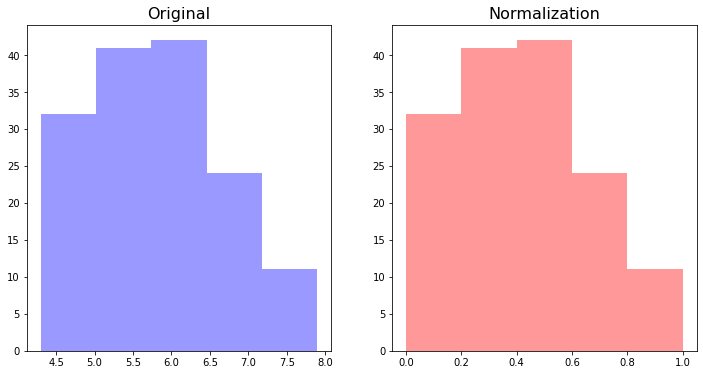

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b', kde = False)
plt.title('Original', fontsize=16)

plt.subplot(1, 2, 2)
sns.distplot(X_mm, bins=5, color='r', kde = False)
plt.title('Normalization', fontsize=16)
plt.show()

### Sklearn MinMaxScaler 사용

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled.min(), x_scaled.max()

(0.0, 1.0)

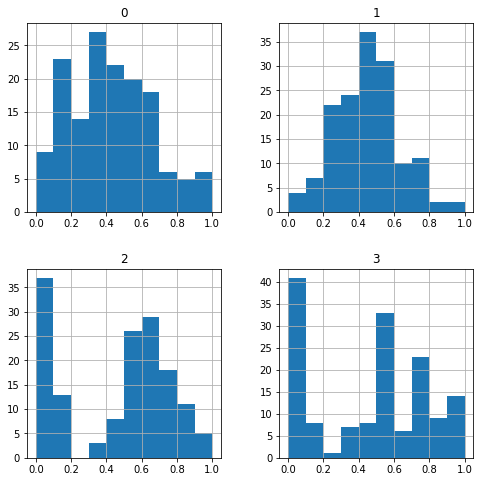

In [ ]:
pd.DataFrame(x_scaled).hist(figsize=(8,8))
plt.show()

## 인코딩 - 카테고리형 데이터

학습 데이터의 특성들은 수치값 뿐만 아니라 ‘크다’, ‘중간’, ‘작다’ 또는 ‘여자’, ‘남자’와 같은 범주값도 존재합니다. 그런데 머신러닝 알고리즘은 문자열 데이터를 입력으로 받지 못합니다.

따라서, 데이터가 가지고 있는 범주형(Categorical) 데이터는 반드시 숫자형(Numerical)으로 변환해주어야 합니다.

인코딩(encoding) 이란, 문자형 -> 숫자형 데이터로 변환 해주는 것을 의미합니다.

이때, 1등급, 2등급, 3등급 처럼 의미에 대소관계, 순위적 연속성 등이 있으면 라벨 인코딩으로 처리를 합니다.

성별, 과일 등 순위관계가 없으면 각각을 벡터로 치환하는 원핫인코딩을 진행합니다.

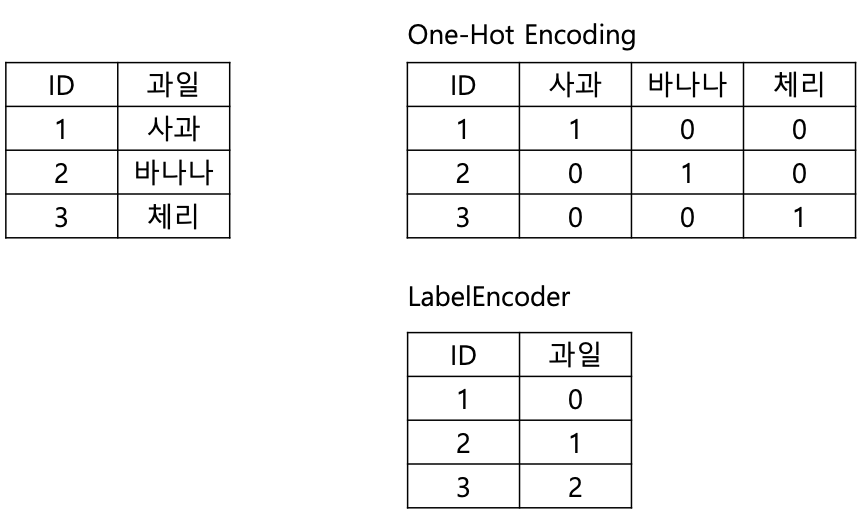

In [ ]:
# 샘플데이터 로드 
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips['day'].value_counts()


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


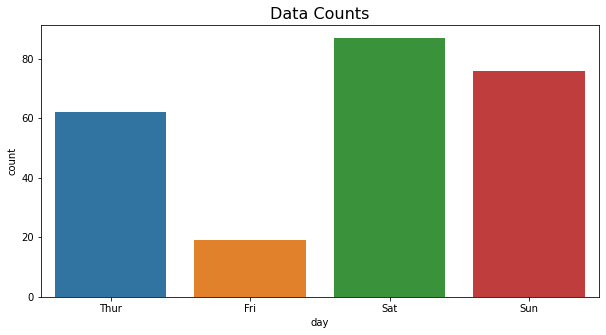

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(tips['day'])
plt.title('Data Counts', fontsize=16)
plt.show()

만약 tips데이터의 day컬럼에서의 값(value)인 [Thur(목), Fri(금), Sat(토), Sun(일)] 을 인코딩(encoding) 해주지 않고 그대로 머신러닝 모델에 학습데이터로 feed한다면 error가 발생합니다.

### Label Encoder 

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
encoded = lb_enc.fit_transform(tips['day'])

In [ ]:
tips.day.values

['Sun', 'Sun', 'Sun', 'Sun', 'Sun', ..., 'Sat', 'Sat', 'Sat', 'Sat', 'Thur']
Length: 244
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
encoded

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [ ]:
# LabelEncoder를 사용하면 원래 class 의 label도 확인할 수 있습니다.
lb_enc.classes_

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [ ]:
lb_enc.inverse_transform([0, 0, 1, 2, 3, 1, 2, 3])

array(['Fri', 'Fri', 'Sat', 'Sun', 'Thur', 'Sat', 'Sun', 'Thur'],
      dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


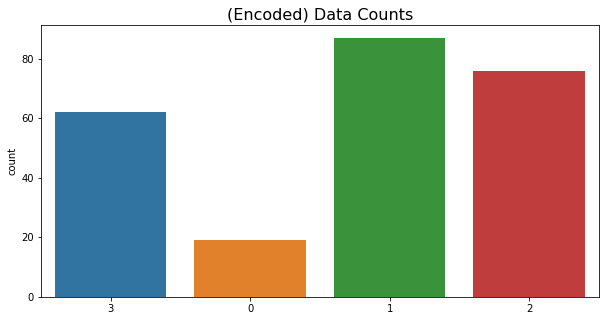

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(encoded, order=[3, 0, 1, 2])
plt.title('(Encoded) Data Counts', fontsize=16)
plt.show()

### OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder()
encoded = oh_enc.fit_transform(tips[['day']])
encoded

<244x4 sparse matrix of type '<class 'numpy.float64'>'
	with 244 stored elements in Compressed Sparse Row format>

In [ ]:
encoded.toarray()

In [ ]:
df_enc = pd.DataFrame(encoded.toarray(), columns = oh_enc.categories_)
df_enc

,Fri,Sat,Sun,Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
239,0.0,1.0,0.0,0.0
240,0.0,1.0,0.0,0.0
241,0.0,1.0,0.0,0.0
242,0.0,1.0,0.0,0.0


In [ ]:
df_enc.sum()

Fri     19.0
Sat     87.0
Sun     76.0
Thur    62.0
dtype: float64

In [ ]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### pandas : get_dummies

In [ ]:
pd.get_dummies(tips['day'])

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0
